Intro) Dans les jeux Pokemon, les pokémons sont regroupés dans ce que l'on appelle des "groupes d'oeufs". Ces groupes déterminent quels pokemons peuvent se reproduire entre eux et sont par conséquent similaire à la notion de "genre animal". Par exemple, le lion et le tigre font parti du même genre et peuve ainsi donner naissance à des hybrides.

Le but de ce projet est d'essayer de construire un modèle de prediction de l'appartenance ou non d'un pokémon aux différents groupes d'oeufs (CLASSIFICATION MULTILABEL)

Dans ce notebook, on transforme les fichiers audio mp3 en séries temporelles sous format csv afin de pouvoir les exploiter par la suite. 

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import random
from os import listdir
from tqdm import tqdm
import pandas as pd
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

C:\ProgramData\Anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


1) Préparation des dossiers

In [2]:
path_spectros = r".\SPECTROS"
path_audio_plots = r".\PLOTS"
path_mp3 = r".\MP3"

2) Vérification du nombre de fichiers MP3

In [3]:
liste_mp3 = listdir(path_mp3)
liste_mp3 = [path_mp3+"\\"+file for file in liste_mp3 
             if "mp3" in file]
len(liste_mp3)

1007

3) Test de Visualisation d'un son 

Text(0, 0.5, 'Amplitude')

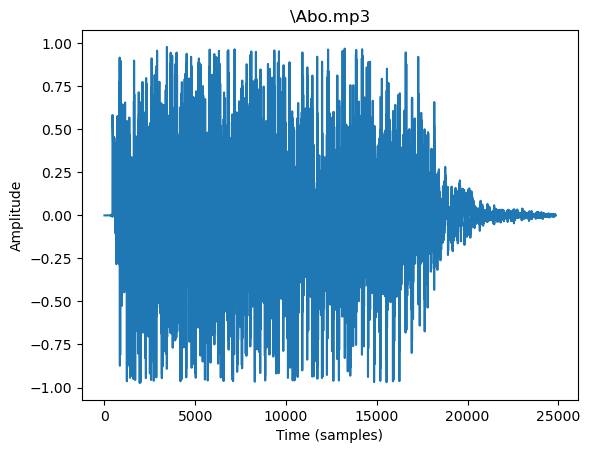

In [4]:
#Visualisation d'un son 
sound, sr = librosa.load(liste_mp3[0])
plt.plot(sound);
plt.title(liste_mp3[0].split("MP3")[1])
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')   

4) Lecture de tous les mp3 et créations des csv, des plots audio et des spectrogrammes associés 

In [ ]:
#Lire les audios et les tranformer en series temporelles,graph amplitude et spectrogrammes
audio_path = r".\MP3"
csv_path =r".\CSV"
plot_path = r".\PLOTS"
spectro_path = r".\SPECTROS"
liste_mp3 = listdir(audio_path)
liste_mp3 = [file for file in liste_mp3 
             if "mp3" in file]

for file_name in tqdm(liste_mp3) :
    try :
        full_sound, sr = librosa.load(f"{audio_path}\{file_name}",sr = 22050/4) #Sample rate assez faible pour éviter d'avoir des elements trop lourds
        times = np.linspace(0, len(full_sound)/sr, num=len(full_sound))
        #Save as CSV
        dic = {"time_in_seconds":times,"amplitude":full_sound}
        df = pd.DataFrame.from_dict(dic)
        df.to_csv(f"{csv_path}\{file_name}.csv".replace(".mp3",""),sep=",",index=False)
        #Save the plot of audio file
        plt.plot(times, full_sound)
        plt.title(f'{file_name}')
        plt.ylabel('Amplitude')
        plt.xlabel('Time (s)')
        plt.savefig(f"{plot_path}\{file_name}.png".replace(".mp3",""),bbox_inches='tight',frameon='false')
        plt.close()
        plt.cla()
        plt.clf()
        #Save the Spectrogram
        spec = np.abs(librosa.stft(np.array(full_sound)))
        spec = librosa.amplitude_to_db(spec, ref=np.max) 
        librosa.display.specshow(spec, sr=sr)
        plt.savefig(f"{spectro_path}\{file_name}.png".replace(".mp3",""),bbox_inches='tight',frameon='false')
        plt.close()
        plt.cla()
        plt.clf()
    except Exception as e :
        print(file_name +" === "+str(e))

5) Exemple d'un spectrogramme

Text(0.5, 1.0, '\\Abo.mp3')

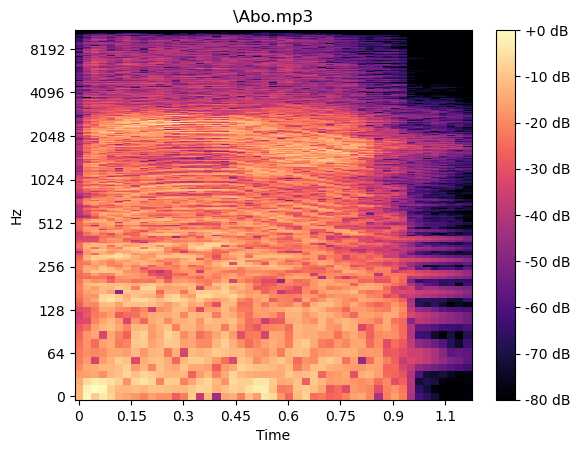

In [13]:
#Spectrogramme
spec = np.abs(librosa.stft(sound))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title(liste_mp3[0].split("MP3")[1])